## Imports

In [15]:
import os
import json
import random
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Retrieving Random Prompts and Saving Them to a CSV File

In [ ]:
def get_random_conversations(data_folder, num_samples=50):

    json_file_patterns = [
        '*_hn_sharings.json',
        '*_pr_sharings.json',
        '*_issue_sharings.json',
        '*_discussion_sharings.json',
        '*_commit_sharings.json',
        '*_discussion_sharings.json'
    ]

    all_conversations = []

    for root, dirs, files in os.walk(data_folder):
        for pattern in json_file_patterns:
            for json_file in glob(os.path.join(root, pattern)):
                try:
                    with open(json_file, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        if 'Sources' in data:
                            sources = data['Sources']
                        else:
                            sources = data  # In case the root is a list
                        for item in sources:
                            chatgpt_sharings = item.get('ChatgptSharing', [])
                            author = item.get('Author', 'Unknown')
                            for sharing in chatgpt_sharings:
                                sharing.pop('HTMLContent', None)
                                sharing['Author'] = author
                                all_conversations.append(sharing)
                except Exception as e:
                    print(f"Error processing file {json_file}: {e}")
                    continue

    print(f"Total conversations found: {len(all_conversations)}")

    if len(all_conversations) < num_samples:
        print(f"Only {len(all_conversations)} conversations available; adjusting sample size to {len(all_conversations)}.")
        num_samples = len(all_conversations)

    random_conversations = random.sample(all_conversations, num_samples)

    csv_data = []
    for idx, convo in enumerate(random_conversations):
        author = convo.get('Author', 'Unknown')
        date = convo.get('DateOfConversation', '')
        url = convo.get('URL', '')
        conversations = convo.get('Conversations', [])
        for turn in conversations:
            prompt = turn.get('Prompt', '').replace('\n', ' ').strip()
            answer = turn.get('Answer', '').replace('\n', ' ').strip()
            csv_data.append({
                'Index': idx + 1,
                'Author': author,
                'Date': date,
                'URL': url,
                'Prompt': prompt,
                'Answer': answer,
                'Classification': ''
            })

    return csv_data

if __name__ == '__main__':
    data_folder = 'snapshots'

    csv_data = get_random_conversations(data_folder, num_samples=50)
    print(f'Selected {len(csv_data)} conversation turns.')

    df = pd.DataFrame(csv_data)
    output_file = 'random_conversations_for_classification.csv'
    df.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f'Random conversations saved to {output_file}')

## Plotting a Graph with the Results

In [7]:
categories = ['Generation', 'Open QA', 'Brainstorming', 'Chat', 'Rewrite', 'Summarization', 'Classification', 'Other', 'Closed QA', 'Extract']

amount = [25, 36, 1, 4, 3, 1, 1, 4, 9, 0]

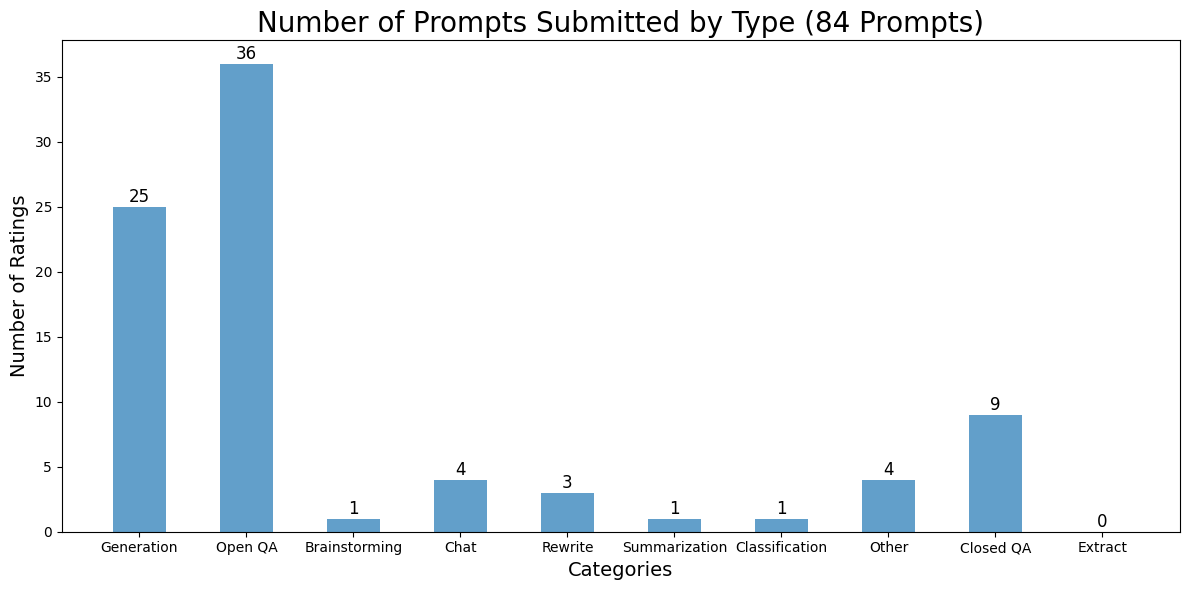

In [24]:
positions = np.arange(len(categories)) * 1.5 

plt.figure(figsize=(12, 6))
plt.bar(categories, amount, width=0.5, alpha=0.7)
plt.title('Number of Prompts Submitted by Type (84 Prompts)', fontsize=20)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)

for i, value in enumerate(amount):
    plt.text(i, value + 0.75, str(value), fontsize=12, ha='center', va='center')

plt.tight_layout()
plt.savefig('prompts.png')
plt.show()